In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank['yy'] = (bank.y == 'yes').astype(int)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yy
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0


In [3]:
%matplotlib inline

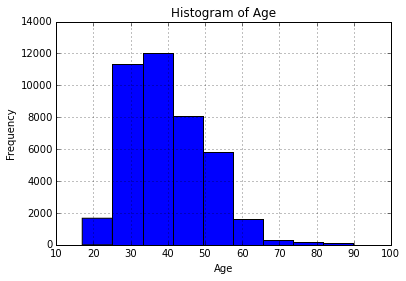

In [23]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [5]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('yy ~ age + housing + default + loan + poutcome + job + marital',
                  bank, return_type="dataframe")
print X.columns

Index([u'Intercept', u'housing[T.unknown]', u'housing[T.yes]',
       u'default[T.unknown]', u'default[T.yes]', u'loan[T.unknown]',
       u'loan[T.yes]', u'poutcome[T.nonexistent]', u'poutcome[T.success]',
       u'job[T.blue-collar]', u'job[T.entrepreneur]', u'job[T.housemaid]',
       u'job[T.management]', u'job[T.retired]', u'job[T.self-employed]',
       u'job[T.services]', u'job[T.student]', u'job[T.technician]',
       u'job[T.unemployed]', u'job[T.unknown]', u'marital[T.married]',
       u'marital[T.single]', u'marital[T.unknown]', u'age'],
      dtype='object')


In [6]:
X = X.rename(columns = {'housing[T.unknown]': 'h_unk',
                        'housing[T.yes]' : 'hsng',
                        'default[T.unknown]': 'd_unk',
                        'default[T.yes]': 'def',
                        'loan[T.unknown]': 'l_unk',
                        'loan[T.yes]' : 'loans',
                        'poutcome[T.nonexistent]': 'nonxst',
                        'poutcome[T.success]': 'succ',
                        'job[T.blue-collar]': 'blue',
                        'job[T.entrepreneur]': 'entr',
                        'job[T.housemaid]' : 'maid',
                        'job[T.management]' :'mgmt',
                        'job[T.retired]' : 'ret',
                        'job[T.self-employed]': 'self',
                        'job[T.services]' : 'svcs',
                        'job[T.student]' : 'stud',
                        'job[T.technician]': 'tech',
                        'job[T.unemployed]': 'unemp',
                        'job[T.unknown]': 'j_unk',
                        'marital[T.married]': 'marr',
                        'marital[T.single]': 'sgl',
                        'marital[T.unknown]' : 'm_unk'})

In [7]:
y = np.ravel(y)

In [8]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X, y)

0.89768864717878993

In [9]:
y.mean()

0.11265417111780131

In [10]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.11201778104]
1,h_unk,[-0.0033017524077]
2,hsng,[0.0364931954748]
3,d_unk,[-0.767585262293]
4,def,[-0.0107178937201]
5,l_unk,[-0.0033017524077]
6,loans,[-0.0574515699991]
7,nonxst,[-0.419554155554]
8,succ,[2.25867153429]
9,blue,[-0.419277948576]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [12]:
predicted = model2.predict(X_test)
print predicted

[ 0.  0.  0. ...,  0.  0.  0.]


In [13]:
probs = model2.predict_proba(X_test)
print probs

[[ 0.92973445  0.07026555]
 [ 0.91971843  0.08028157]
 [ 0.96620526  0.03379474]
 ..., 
 [ 0.92185103  0.07814897]
 [ 0.90608923  0.09391077]
 [ 0.90039845  0.09960155]]


In [14]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:,1])

0.896981467994
0.690534373397


In [15]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.8873513   0.8873513   0.88856519  0.89366351  0.89536295  0.90410294
  0.91624181  0.91429959  0.92617776  0.85041282]
0.896352915528
